# -------------------- Titanic Survival Prediction Case Study -----------------------

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

### Loading Dataset

In [3]:
df=pd.read_csv("G:/study_vidya/LetsUPgrade/1_AI_ML_Course/Daywise_notes/Day_24/Dataset/Titanic_train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Checking shape of dataset

In [5]:
df.shape

(891, 12)

### Checking Null Values

In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

##### As the total 891 rows , In 'Cabin' there are more than 70% data is missing , so it is irrelevant to fill it

### Drop Cabin column

In [6]:
df.pop('Cabin')

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [7]:
df.shape

(891, 11)

#### Filling Missing Values

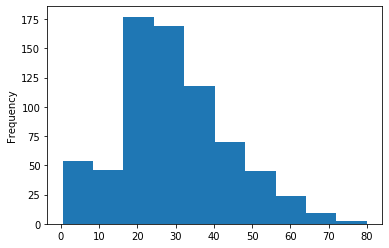

In [8]:
df['Age'].plot.hist()

#### as Curve is Bell Shaped , so fill the missing values by Mean

In [9]:
df['Age'].fillna(df['Age'].mean(), inplace= True)

#### Embarked column is categorical so calculating the mode and filling it

In [10]:
df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

#### We observe that max people are from S-southampton so we fill all with S

In [11]:
df["Embarked"].fillna(value='S',inplace=True)

#### Now checking missing values

In [12]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

###### All missing values are filled now 

#### Droping Irrelevent columns
    As the name column contain different name and the survival is not relevant to names
    passenger Id does not make any sense
    Ticket number doesnt provide any relevant information whether they survived or not so drop it


In [13]:
df.drop(['PassengerId','Name','Ticket'], axis=1, inplace=True)

In [14]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


#### Now data only conatin relevant columns

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


#### Changing Text data to Categorical
    Label Encoding it encode the value as per given instance
    Eg- columns has 3 category C/S/Q--it will form label suppose 0-C, 1-S, 2-Q

In [16]:
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()

df["Sex"] = lab.fit_transform(df["Sex"])
df["Embarked"] = lab.fit_transform(df["Embarked"])

In [17]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


### EDA
    I am prefering Raw Data for EDA : (not cleaned data)

In [18]:
eda=pd.read_csv("G:/study_vidya/LetsUPgrade/1_AI_ML_Course/Daywise_notes/Day_24/Dataset/Titanic_train.csv")
eda.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Catplot

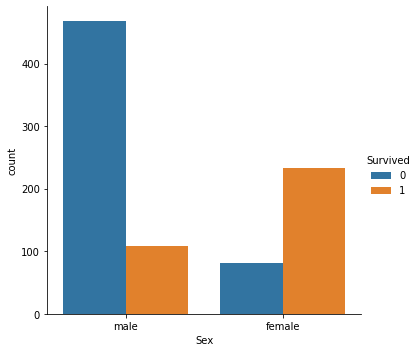

In [19]:
sns.catplot(x ="Sex", hue ="Survived", kind ="count", data = eda)

#### Inference:
    Just by observing the graph, it can be approximated that:

    The survival rate of men is around 20% and that of women is around 75%.
    Therefore,whether a passenger is a male or a female plays an important role in determining if one is going to survive.


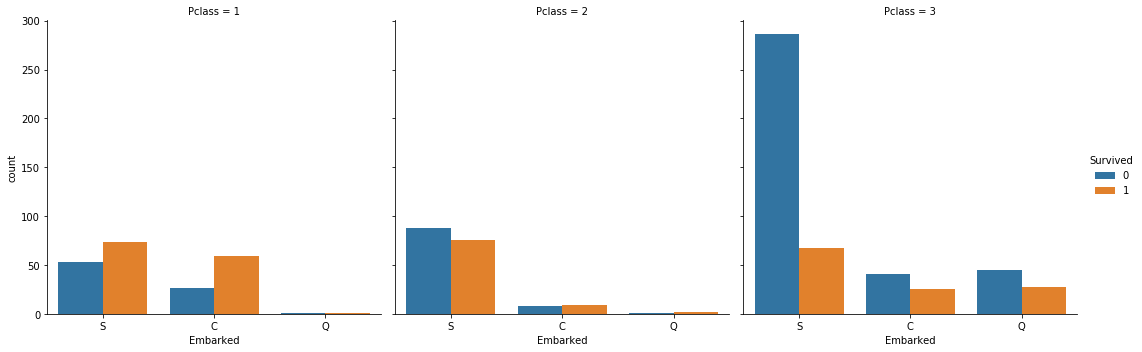

In [21]:
sns.catplot(x ='Embarked', hue ='Survived', kind ='count', col ='Pclass', data =eda)

#### Heatmap

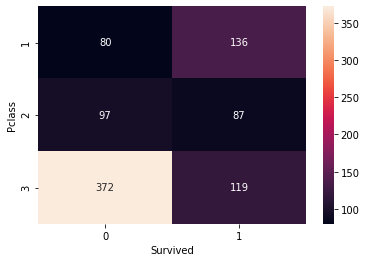

In [22]:
# Group the dataset by Pclass and Survived and then unstack them 

group = eda.groupby(['Pclass', 'Survived']) 
pclass_survived = group.size().unstack() 

# Heatmap - Color encoded 2D representation of data. 

sns.heatmap(pclass_survived, annot = True, fmt ="d")

# Naive Bayes

### Importing modules

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import * 
from sklearn.metrics import accuracy_score, confusion_matrix

#### Training & Predicting Accuracy, Confusion Matrix of the model using Naive Bayes
    Naive Bayes is used to classify Record with the help of Probability
    As we Know, Naive Bayes is only applicable for Categorical variables.
    Only for Categorical Variables we are predicting Accuracy & Confusion Matrix :
Categorical Columns are: Survived, Pclass, Sex, SibSp, Parch, Embarked


##### By Using Function:


In [24]:
def prediction(col):
    
    clf = BernoulliNB()

    for i in col:
        x = df.drop([i], axis=1)
        print("--------------------------------------------------------------------------------------")
        print(f"Here Dependent Variable is {i} & remaining are Independent Variables")
        print("x :\n", x.head())
        y = df[i]
        print("\ny:\n", y.head())
    
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.3, random_state=0)
        model = clf.fit(x_train,y_train)
        pred = model.predict(x_test)
    
        print(f"\nAcuuracy for {i} is: ", accuracy_score(y_test, pred, normalize=True))
        print(f"Confusion matrix for {i} is \n", confusion_matrix(y_test, pred))

column = ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch','Embarked']        
prediction(column)

--------------------------------------------------------------------------------------
Here Dependent Variable is Survived & remaining are Independent Variables
x :
    Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0       3    1  22.0      1      0   7.2500         2
1       1    0  38.0      1      0  71.2833         0
2       3    0  26.0      0      0   7.9250         2
3       1    0  35.0      1      0  53.1000         2
4       3    1  35.0      0      0   8.0500         2

y:
 0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

Acuuracy for Survived is:  0.7835820895522388
Confusion matrix for Survived is 
 [[137  31]
 [ 27  73]]
--------------------------------------------------------------------------------------
Here Dependent Variable is Pclass & remaining are Independent Variables
x :
    Survived  Sex   Age  SibSp  Parch     Fare  Embarked
0         0    1  22.0      1      0   7.2500         2
1         1    0  38.0      1      0  71.2833         0
2   

#### Resultant Accuracy Score

In [25]:
score = {'Dependent Variable': ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch','Embarked'],
         'Accuracy Score': [0.7835,0.5932,0.7835,0.6791,0.7425,0.6977],
         'Total ':[268,268,268,268,268,268],
         'Correct Prediction':[210,159,210,182,199,187],
         'Incorrect Prediction':[58,109,58,86,69,81]}
score = pd.DataFrame(score)
score

,Dependent Variable,Accuracy Score,Total,Correct Prediction,Incorrect Prediction
0,Survived,0.7835,268,210,58
1,Pclass,0.5932,268,159,109
2,Sex,0.7835,268,210,58
3,SibSp,0.6791,268,182,86
4,Parch,0.7425,268,199,69
5,Embarked,0.6977,268,187,81


### Conclusion:
    The Survived Column & Gender column has same accuracy score
    Pclass has the least accuracy